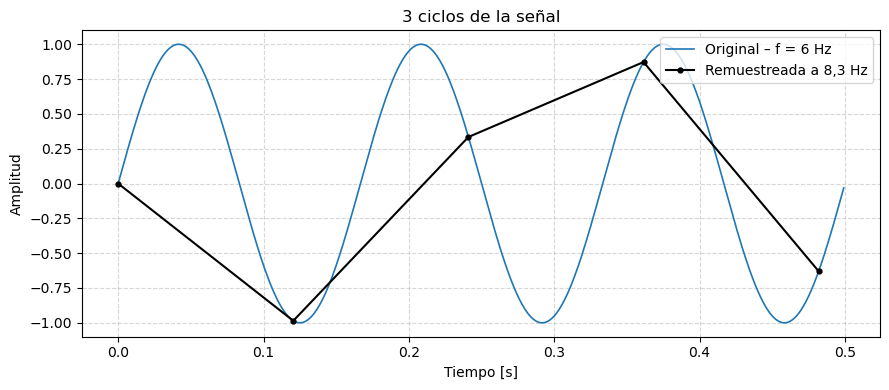

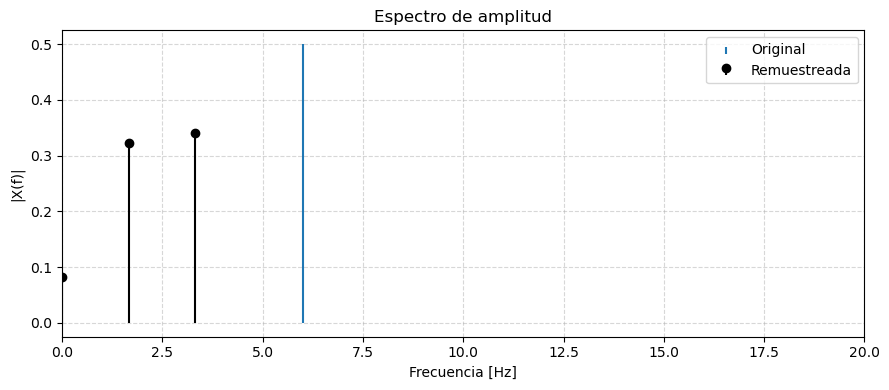

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq           # ↔ FFT nativa de SciPy
# ───────────────────────────────────────────
# 1) Parámetros de la señal original
# ───────────────────────────────────────────
f0          = 6            # Hz – frecuencia de la senoidal
n_ciclos    = 3            # ciclos visibles (0 → 0,5 s)
m_p_ciclo   = 200          # muestras/ciclo  →  fs = 6*200 = 1 200 Hz

fs          = f0 * m_p_ciclo
T_total     = n_ciclos / f0                   # 0,5 s

t           = np.linspace(0, T_total,
                          n_ciclos*m_p_ciclo,
                          endpoint=False)
x           = np.sin(2*np.pi*f0*t)

# ───────────────────────────────────────────
# 2) Remuestreo “manual” a fs_res = 8,3 Hz
#    (usamos la propia definición de la señal
#    para evitar los ceros que produce
#    signal.resample con tan pocas muestras)
# ───────────────────────────────────────────
fs_res      = 8.3           # Hz
t_res       = np.arange(0, T_total, 1/fs_res)   # 5 puntos (0 … 0,4819 s)
x_res       = np.sin(2*np.pi*f0*t_res)

# ───────────────────────────────────────────
# 3) Gráfica comparativa (Parte A)
# ───────────────────────────────────────────
plt.figure(figsize=(9,4))
plt.plot(t,     x,     label='Original – f = 6 Hz', lw=1.2)
plt.plot(t_res, x_res, 'k.-', ms=7,
         label='Remuestreada a 8,3 Hz')
plt.title('3 ciclos de la señal')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True, ls='--', alpha=.5)
plt.legend(loc='upper right')
plt.tight_layout()

# ───────────────────────────────────────────
# 4) FFT de ambas señales (Parte B)
# ───────────────────────────────────────────
X      = fft(x)
freq   = fftfreq(len(x), 1/fs)
X_res  = fft(x_res)
freq_r = fftfreq(len(x_res), 1/fs_res)

# │││  Opcional: mostrar módulo del espectro
plt.figure(figsize=(9,4))
plt.stem(freq,   np.abs(X)/len(X),
         linefmt='tab:blue', markerfmt=' ', basefmt=' ')
plt.stem(freq_r, np.abs(X_res)/len(X_res),
         linefmt='k-', markerfmt='ko', basefmt=' ')
plt.xlim(0, 20)        # basta con parte positiva
plt.title('Espectro de amplitud')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|X(f)|')
plt.grid(True, ls='--', alpha=.5)
plt.legend(['Original', 'Remuestreada'], loc='upper right')
plt.tight_layout()

plt.show()
